## Observations and Insights 

* Look across all previously generated figures and tables and write at least three observations or inferences that can be made from the data. Include these observations at the top of notebook.

Three major observations I found was first, looking at the box blot the biggest outlier was in infubinon. Looking at the line plot for capomulin, as the time went on the tumor volume decreased, which means that drug worked. Last looking at the scatter plot with the liner regressiong you can see there is a positive correlation between tumor volume and the weight of the mouse, of .84.

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# Combine the data into a single dataset
#you would use the merge function, and the similar column in both csv files is "Mouse ID"
#drop any dublicates with .drop_duplicates
merge_table = pd.merge(study_results, mouse_metadata, how = "left", on="Mouse ID")

# Display the data table for preview
# to display you would do "name_df.head()"
merge_table.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
# Checking the number of mice.
total_mice = len(merge_table["Mouse ID"].value_counts())

unique_count=pd.DataFrame([total_mice],columns = ["Total Mice"])
unique_count

,Total Mice
0,249


In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = merge_table.loc[merge_table.duplicated(subset = ["Mouse ID","Timepoint"]), 'Mouse ID'].unique()
duplicates

duplicate_count=pd.DataFrame([duplicates],columns = ["Mouse ID"])
duplicate_count


,Mouse ID
0,g989


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mice = merge_table.loc[merge_table["Mouse ID"] == "g989", :]
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = merge_table[merge_table['Mouse ID'].isin(duplicates)==False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [9]:
# Checking the number of mice in the clean DataFrame.
clean_count = clean_df["Mouse ID"].unique()
clean_length = len(clean_count)
clean_length

clean_count_df = pd.DataFrame([clean_length], columns = ["Number of MIce"])
clean_count_df

,Number of MIce
0,248


## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_mean = merge_table.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
tumor_median = merge_table.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
tumor_variance = merge_table.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
tumor_sd = merge_table.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
tumor_sem = merge_table.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

# This method is the most straighforward, creating multiple series and putting them all together at the end.
tumor_summary = pd.DataFrame({
                            "Tumor Mean":tumor_mean,
                            "Tumor Median":tumor_median,
                            "Tumor Variance":tumor_variance,
                            "Tumor Standard Deviation":tumor_sd,
                            "Tumor SEM":tumor_sem
})
tumor_summary

,Tumor Mean,Tumor Median,Tumor Variance,Tumor Standard Deviation,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
tumor_summary2 = merge_table.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean","median","var","std","sem"]})
tumor_summary2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

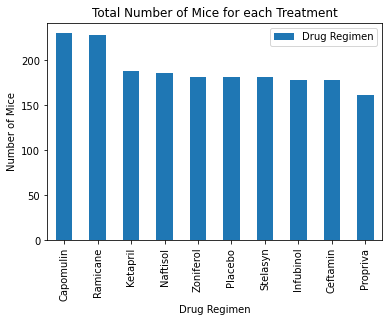

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
total_number_mice = merge_table['Drug Regimen'].value_counts()
total_number_mice.plot(kind = 'bar')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Total Number of Mice for each Treatment")
plt.legend()
plt.show()

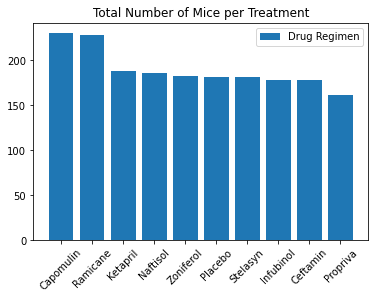

In [13]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
plt.bar(total_number_mice.index.values, total_number_mice.values)
plt.xticks(rotation = 45)
plt.legend(["Drug Regimen"])
plt.title("Total Number of Mice per Treatment")
plt.show()

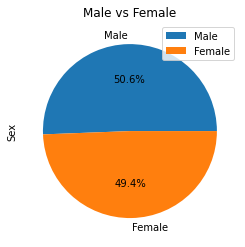

In [89]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
male_female = merge_table["Sex"].value_counts()
male_female.plot(kind = 'pie', autopct='%1.1f%%')
plt.title("Male vs Female")
plt.legend()
plt.show()

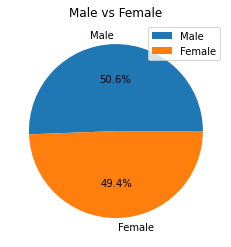

In [62]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(male_female.values, labels = male_female.index.values, autopct='%1.1f%%')
plt.title("Male vs Female")
plt.legend(["Male","Female"])
plt.show()

## Quartiles, Outliers and Boxplots

In [63]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

last_timepoint = merge_table.groupby(['Mouse ID'])['Timepoint'].max()
last_timepoint = last_timepoint.reset_index()
last_timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
data_merge = last_timepoint.merge(merge_table, on = ['Mouse ID', 'Timepoint'],how = "left")
data_merge

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [88]:
# Put treatments into a list for for loop (and later for plot labels)
list_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for i in list_treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = data_merge.loc[data_merge["Drug Regimen"] == i, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(tumor_volume)
    
    
    # Determine outliers using upper and lower bounds
    quartiles_info = tumor_volume.quantile([.25,.5,.75])
    lower_range = quartiles_info[0.25]
    upper_range = quartiles_info[0.75]
    middle_range = upper_range - lower_range
    
    lower_bound = lower_range - (1.5*middle_range)
    upper_bound = upper_range + (1.5*middle_range)
    
    find_outlier= tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    print(f"{i} outliers {find_outlier}")
   

Capomulin outliers Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane outliers Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol outliers 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin outliers Series([], Name: Tumor Volume (mm3), dtype: float64)


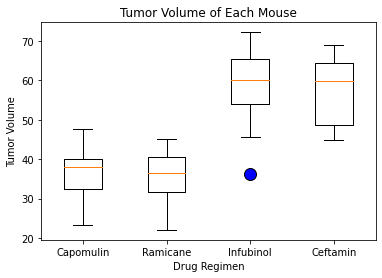

In [97]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
blue_out = dict(markerfacecolor = 'blue', markersize = 12)
fig1, ax1 = plt.subplots()
plt.boxplot(tumor_vol_data, labels = list_treatments, flierprops = blue_out)
ax1.set_ylabel("Tumor Volume")
ax1.set_xlabel("Drug Regimen")
plt.title("Tumor Volume of Each Mouse")
plt.show()

## Line and Scatter Plots

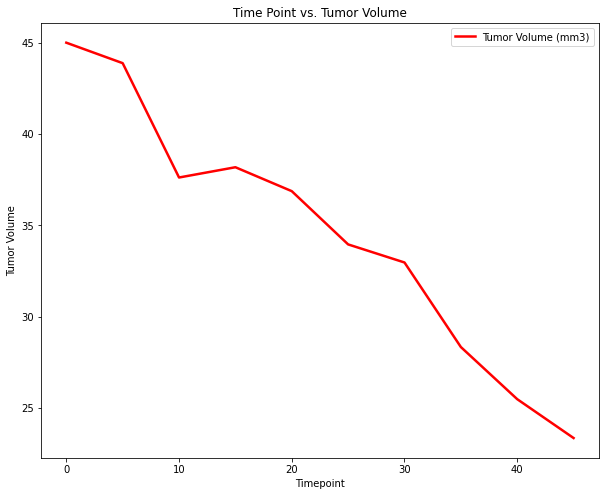

In [29]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_mice = merge_table.loc[merge_table["Drug Regimen"] == "Capomulin", :]
cap_mice = merge_table.loc[merge_table ["Mouse ID"]=="s185", :]

single_mice = cap_mice.loc[cap_mice["Mouse ID"] == "s185"]

single_mice = single_mice.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
single_mice = single_mice.reset_index(drop=True)
single_mice.set_index('Timepoint').plot(figsize=(10, 8), linewidth=2.5, color='red')

plt.title("Time Point vs. Tumor Volume")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")

plt.show()

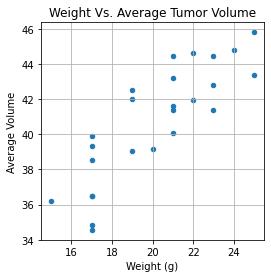

In [83]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#scatter_df = cap_mice.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]

cap_mice = merge_table.loc[merge_table["Drug Regimen"] == "Capomulin", :]
scatter_df = cap_mice.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
average_capomulin = pd.DataFrame(cap_mice.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
average_capomulin = average_capomulin.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
average_capomulin = average_capomulin.set_index('Mouse ID')
average_capomulin.plot(kind="scatter", x="Weight (g)", y="Average Volume", grid=True, figsize=(4,4),
              title="Weight Vs. Average Tumor Volume")
plt.show()


## Correlation and Regression

In [56]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

mouse_weight = average_capomulin.iloc[:,0]
avg_tumor_volume = average_capomulin.iloc[:,1]
correlation = st.pearsonr(mouse_weight,avg_tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


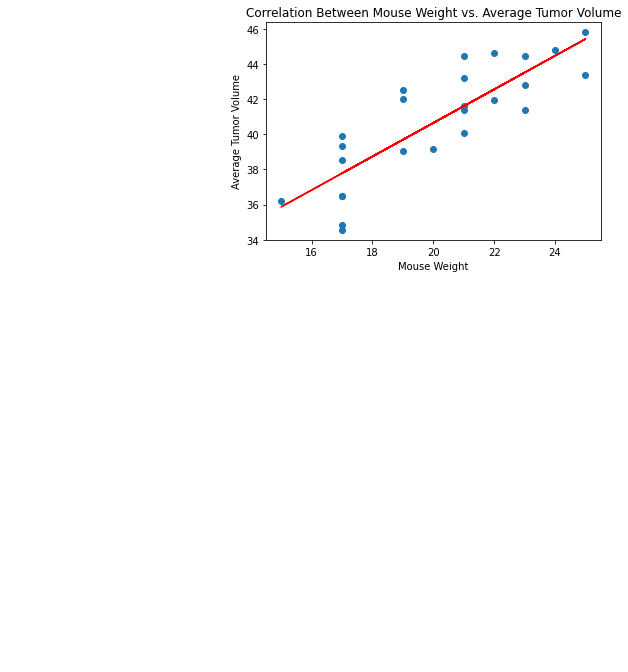

In [86]:
x_values = average_capomulin['Weight (g)']
y_values = average_capomulin['Average Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Correlation Between Mouse Weight vs. Average Tumor Volume')
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.show()